# TechCorner Sales Update

## Loading Dataset and Importing necessary Libraries

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load dataset
file_path = "TechCorner_Sales_update.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,1,27-05-2024,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2,27-05-2024,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,3,27-05-2024,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,4,27-05-2024,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,5,27-05-2024,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


In [37]:
# Check for missing values
print(df.isnull().sum())

# Convert 'Sell Price' & 'Age' to numeric
df["Sell Price"] = pd.to_numeric(df["Sell Price"], errors="coerce")
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Convert 'Date' to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop any remaining NaN values
df = df.dropna()

# Confirm data types
df.info()

Cus.ID                                  0
Date                                    0
Cus. Location                           0
Age                                     0
Gender                                  0
Mobile Name                             0
Sell Price                              0
Does he/she Come from Facebook Page?    0
Does he/she Followed Our Page?          0
Did he/she buy any mobile before?       0
Did he/she hear of our shop before?     0
dtype: int64


C:\Users\boluz\AppData\Local\Temp\ipykernel_11320\1435830475.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Cus.ID                                8871 non-null   int64         
 1   Date                                  8871 non-null   datetime64[ns]
 2   Cus. Location                         8871 non-null   object        
 3   Age                                   8871 non-null   int64         
 4   Gender                                8871 non-null   object        
 5   Mobile Name                           8871 non-null   object        
 6   Sell Price                            8871 non-null   float64       
 7   Does he/she Come from Facebook Page?  8871 non-null   object        
 8   Does he/she Followed Our Page?        8871 non-null   object        
 9   Did he/she buy any mobile before?     8871 non-null   object        
 10  

## Exploratory Data Analysis(EDA)

### Monthly Sales Trend

In [38]:
# Extract the month and count the number of sales per month
df["Month"] = df["Date"].dt.strftime("%Y-%m")  # Format as YYYY-MM for clarity

# Count the number of sales per month
monthly_sales = df.groupby("Month").size()
print(monthly_sales)

Month
2024-05    153
2024-06    861
2024-07    898
2024-08    912
2024-09    916
2024-10    943
2024-11    838
2024-12    935
2025-01    900
2025-02    874
2025-03    641
dtype: int64


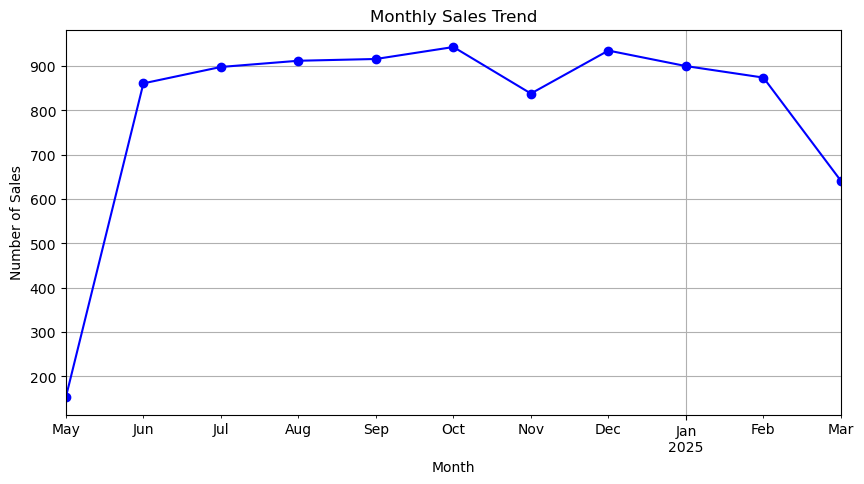

In [39]:
df["Month"] = df["Date"].dt.to_period("M")

plt.figure(figsize=(10,5))
df.groupby("Month").size().plot(kind="line", marker="o", color="blue")

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.grid(True)
plt.show()

### Sales Distribution by Customer Location

In [40]:
# Count of sales by Customer location(Numerical Breakdown)
location_sales = df["Cus. Location"].value_counts()
print(location_sales)

Cus. Location
Outside Rangamati    3000
Rangamati Sadar      2972
Inside Rangamati     2899
Name: count, dtype: int64


C:\Users\boluz\AppData\Local\Temp\ipykernel_11320\4177943010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Cus. Location"], palette="coolwarm", order=df["Cus. Location"].value_counts().index)


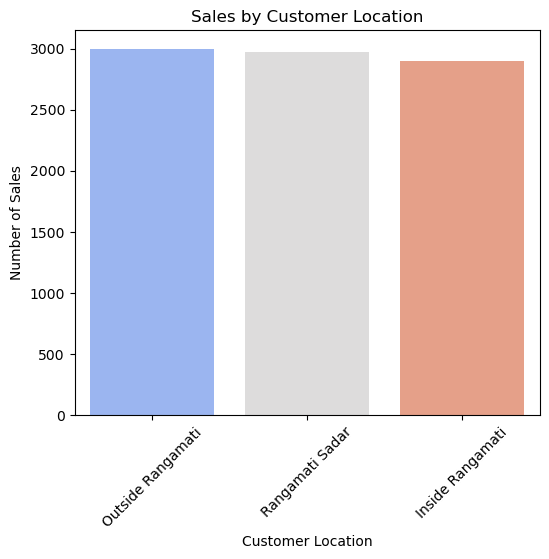

In [41]:
plt.figure(figsize=(6,5))
sns.countplot(x=df["Cus. Location"], palette="coolwarm", order=df["Cus. Location"].value_counts().index)

plt.title("Sales by Customer Location")
plt.xlabel("Customer Location")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()

### Age Distribution of Customers

In [42]:
# Age distribution of customers(Numerical Breakdown)
age_stats = df["Age"].describe()
print(age_stats)

count    8871.000000
mean       34.047007
std         9.592612
min        18.000000
25%        26.000000
50%        34.000000
75%        42.000000
max        50.000000
Name: Age, dtype: float64


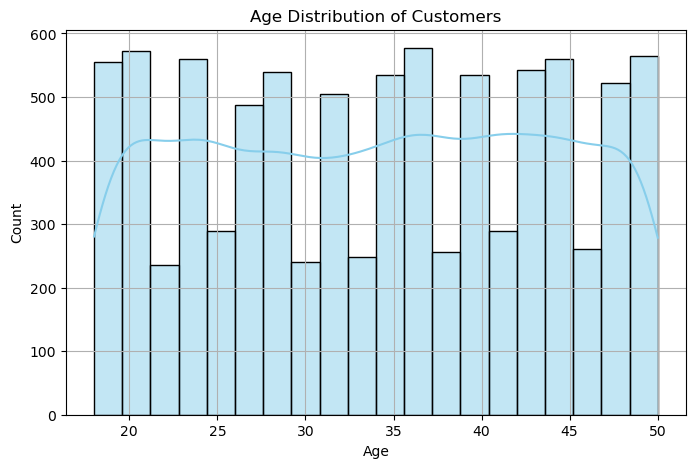

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")

plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Gender Distribution of Buyers

In [44]:
# Count of sales by gender(Numerical Breakdown)
gender_sales = df["Gender"].value_counts()
print(gender_sales)

Gender
F    4453
M    4418
Name: count, dtype: int64


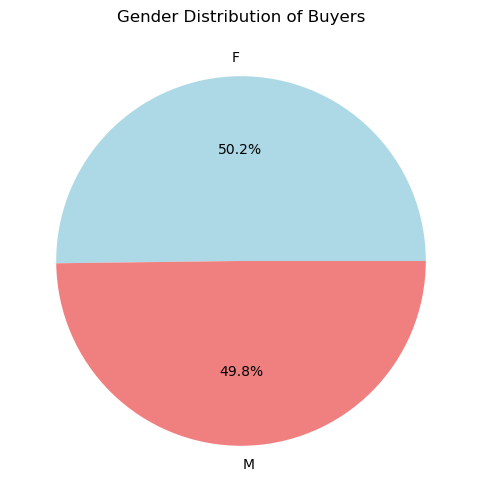

In [45]:
plt.figure(figsize=(6,6))
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightcoral"])
plt.title("Gender Distribution of Buyers")
plt.ylabel("")  # Hide y-label
plt.show()

### Top 10 Most Sold Mobile Names

In [46]:
# Top 10 most sold mobile models(Numerical Breakdown)
top_10_mobiles = df["Mobile Name"].value_counts().nlargest(10)
print(top_10_mobiles)

Mobile Name
Moto G85 5G 8/128          560
Galaxy S24 Ultra 12/256    541
Note 11S 6/128             538
Pixel 8 Pro 12/256         533
Narzo N53 4/64             530
Redmi Note 12 Pro 8/128    528
Galaxy M35 5G 8/128        528
Galaxy A55 5G 8/128        522
iQOO Z7 5G 6/128           522
iPhone 16 Pro 256GB        521
Name: count, dtype: int64


C:\Users\boluz\AppData\Local\Temp\ipykernel_11320\167128741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mobiles.index, y=top_mobiles.values, palette="coolwarm")


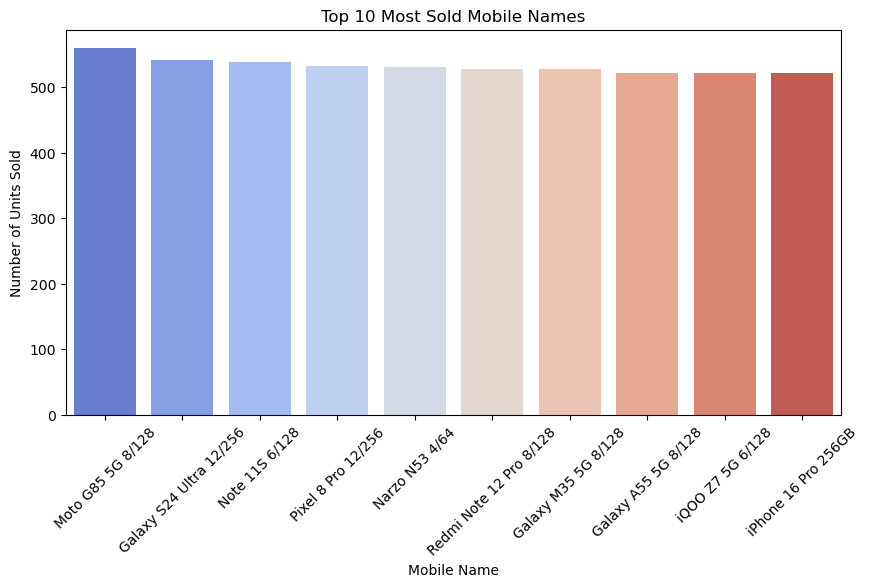

In [47]:
plt.figure(figsize=(10,5))

top_mobiles = df["Mobile Name"].value_counts().nlargest(10)
sns.barplot(x=top_mobiles.index, y=top_mobiles.values, palette="coolwarm")

plt.title("Top 10 Most Sold Mobile Names")
plt.xlabel("Mobile Name")
plt.ylabel("Number of Units Sold")
plt.xticks(rotation=45)
plt.show()

### Sales Price Distribution

In [48]:
# Statistics on selling price(Numerical Breakdown)
price_stats = df["Sell Price"].describe()
print(price_stats)

count      8871.00000
mean      25068.38654
std       18032.80271
min       12702.00000
25%       17466.50000
50%       21682.00000
75%       25777.50000
max      200465.00000
Name: Sell Price, dtype: float64


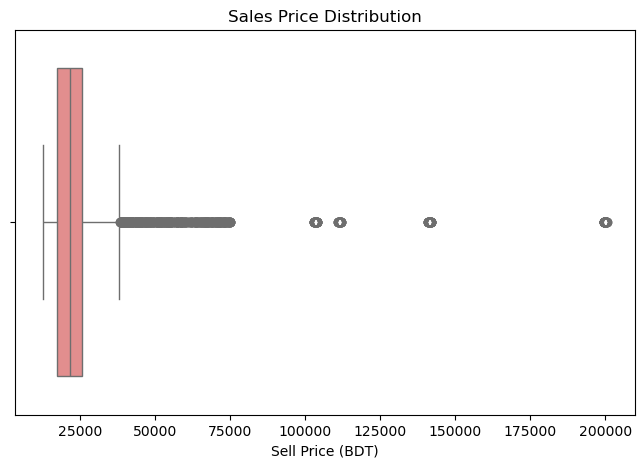

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Sell Price"], color="lightcoral")

plt.title("Sales Price Distribution")
plt.xlabel("Sell Price (BDT)")
plt.show()

### Facebook Marketing Effectiveness

In [50]:
# Count of customers who came from facebook(Numerical Breakdown)
facebook_effectiveness = df["Does he/she Come from Facebook Page?"].value_counts()
print(facebook_effectiveness)

Does he/she Come from Facebook Page?
No     5781
Yes    3090
Name: count, dtype: int64


C:\Users\boluz\AppData\Local\Temp\ipykernel_11320\22970438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Does he/she Come from Facebook Page?"], palette="muted")


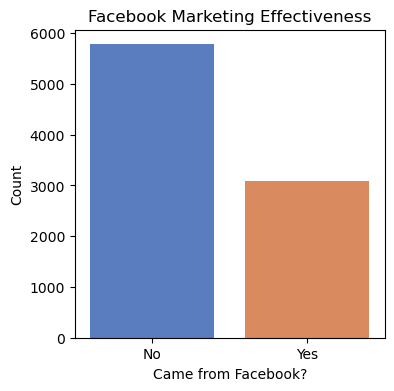

In [64]:
plt.figure(figsize=(4,4))
sns.countplot(x=df["Does he/she Come from Facebook Page?"], palette="muted")

plt.title("Facebook Marketing Effectiveness")
plt.xlabel("Came from Facebook?")
plt.ylabel("Count")
plt.show()

### New vs Returning Customers

In [52]:
# count New vs Returning Customers(Numerical Breakdown)
returning_customers = df["Did he/she buy any mobile before?"].value_counts()
print(returning_customers)

Did he/she buy any mobile before?
No     6677
Yes    2194
Name: count, dtype: int64


C:\Users\boluz\AppData\Local\Temp\ipykernel_11320\2048172044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Did he/she buy any mobile before?"], palette="pastel")


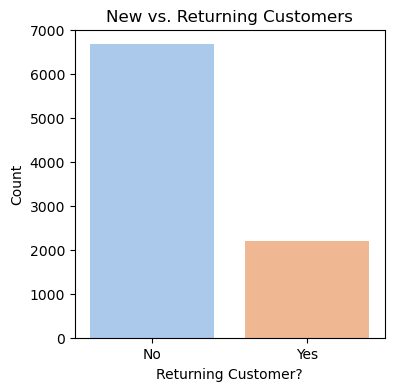

In [63]:
plt.figure(figsize=(4,4))
sns.countplot(x=df["Did he/she buy any mobile before?"], palette="pastel")

plt.title("New vs. Returning Customers")
plt.xlabel("Returning Customer?")
plt.ylabel("Count")
plt.show()

In [58]:
# Distribution of customers following the facebook page (Numerical Breakdown)
facebook_page = df["Does he/she Followed Our Page?"].value_counts()
print(facebook_page)

Does he/she Followed Our Page?
No     5314
Yes    3557
Name: count, dtype: int64


C:\Users\boluz\AppData\Local\Temp\ipykernel_11320\2188907682.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fb_follow_counts.index, y=fb_follow_counts.values, palette=['#3B9C9C', '#F08080'])


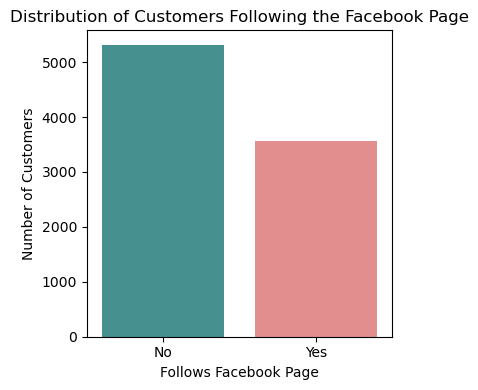

In [62]:
# Count of Facebook followers
fb_follow_counts = df["Does he/she Followed Our Page?"].value_counts()

# Plot
plt.figure(figsize=(4, 4))
sns.barplot(x=fb_follow_counts.index, y=fb_follow_counts.values, palette=['#3B9C9C', '#F08080'])
plt.title("Distribution of Customers Following the Facebook Page")
plt.xlabel("Follows Facebook Page")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()